In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, make_scorer

In [3]:
data_path = os.path.join(os.getcwd(), '..', '..', 'data', 'preprocessed_data.csv')

In [4]:
df = pd.read_csv(data_path)
df.head()

,property_name,room_id,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,...,beachfront,building_staff,lat,lng,distance_to_coastline,booking_window,stay_duration_in_days,review_sentiment_score,rating,average_daily_rate
0,Bingin Ombak,431874,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,15.6035,81,4,0.458603,4.0,1.477799e+06
1,Bingin Ombak,431875,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,15.6035,81,4,0.458603,4.0,1.477799e+06
2,Bingin Ombak,396658,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,15.6035,81,4,0.458603,4.0,1.477799e+06
3,Bingin Ombak,396427,1,2,1,2,1,0,0,0,...,1,0,-8.805646,115.113378,15.6035,81,4,0.455450,4.0,1.477799e+06
4,Bingin Ombak,396427,1,2,1,2,1,0,0,0,...,1,0,-8.805646,115.113378,15.6035,81,4,0.455450,4.0,1.477799e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58903 entries, 0 to 58902
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_name           58903 non-null  object 
 1   room_id                 58903 non-null  int64  
 2   bedroom                 58903 non-null  int64  
 3   bathroom                58903 non-null  int64  
 4   beds                    58903 non-null  int64  
 5   guests                  58903 non-null  int64  
 6   wifi                    58903 non-null  int64  
 7   tv                      58903 non-null  int64  
 8   cable_tv                58903 non-null  int64  
 9   ac                      58903 non-null  int64  
 10  workspace               58903 non-null  int64  
 11  hot_water               58903 non-null  int64  
 12  parking                 58903 non-null  int64  
 13  pool                    58903 non-null  int64  
 14  gym                     58903 non-null

###  Normalize the features

In [6]:
# Separate features and target variable
X = df.drop(columns=['average_daily_rate', 'property_name', 'room_id'])  # Features
y = df['average_daily_rate']  # Target variable

# Melakukan standarisasi pada fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Create Model

In [25]:
# Initialize the XGBoost model
model = GradientBoostingRegressor(n_estimators=2000, max_depth=7, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'Mean Absolute Error on Training: {mae_train}')
print(f'Mean Absolute Error on Test: {mae_test}')

Mean Absolute Error on Training: 13932.399483744575
Mean Absolute Error on Test: 23055.67049048372


### Tune the hyperparameter

In [7]:
# Inisialisasi model Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Definisi grid parameter yang akan dijelajahi
param_grid = {
    'n_estimators': [100, 1000, 2000],
    'learning_rate': [0.3, 0.5, 0.7],
    'max_depth': [3, 5, 7]
    # 'subsample': [0.8, 0.9, 1.0],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5, verbose=2)

# Melatih model pada data
grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik
best_gb_regressor = grid_search.best_estimator_

# Memprediksi pada set pengujian
y_pred = best_gb_regressor.predict(X_test)

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   8.8s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   8.6s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   8.9s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   8.2s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   7.9s
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time= 1.3min
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time= 1.3min
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time= 1.3min
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time= 1.4min
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=1000; total time= 1.3min
[CV] END ..learning_rate=0.3, max_depth=3, n_estimators=2000; total time= 2.6min
[CV] END ..learning_rate=0.3, max_depth=3, n_es

In [ ]:
# # Inisialisasi model Gradient Boosting Regressor
# gb_regressor = GradientBoostingRegressor(random_state=42)

# # Definisi grid parameter yang akan dijelajahi
# param_grid = {
#     'n_estimators': [500, 1000, 2000, 3000],
#     'learning_rate': [0.7],
#     'max_depth': [7],
#     'subsample': [1.0],
#     'min_samples_split': [2],
#     'min_samples_leaf': [1]
# }

# # Membuat objek GridSearchCV
# grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=2)

# # Melatih model pada data
# grid_search.fit(X_train, y_train)

# # Mendapatkan model terbaik
# best_gb_regressor = grid_search.best_estimator_

# # Memprediksi pada set pengujian
# y_pred = best_gb_regressor.predict(X_test)

# # Menghitung MAE
# mae = mean_absolute_error(y_test, y_pred)
# print("MAE:", mae)

# # Mendapatkan parameter terbaik
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

### Model dengan parameter terbaik

In [15]:
# # Initialize the GradientBoostingRegressor model
# model = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.7, 
#                                   max_depth=7, subsample=1.0, 
#                                   min_samples_split=2, min_samples_leaf=1)

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = model.predict(X_test)

# # Evaluate the model
# mae = mean_absolute_error(y_test, y_pred)
# print(f'Mean Absolute Error: {mae}')

### Cross Validation

In [10]:
best_model = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.3, max_depth=7, random_state=42)
# menentukan skema k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# menentukan scoring function
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Melakukan cross-validation pada model terbaik
scores = cross_val_score(best_model, X_train, y_train, scoring=scorer, cv=kf)

# Karena scoring='neg_mean_absolute_error', hasilnya negatif, jadi kita ambil nilai absolutnya
mae_scores = -scores

# Cetak nilai MAE untuk setiap fold
print("MAE scores for each fold:", mae_scores)

# Rata-rata dan standar deviasi dari nilai MAE
print("Mean MAE on Cross Validation:", mae_scores.mean())
print("Standard Deviation of MAE:", mae_scores.std())

# Melatih model pada data
best_model.fit(X_train, y_train)

# Memprediksi pada set pengujian
y_pred_cv = best_model.predict(X_test)

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred_cv)
print("MAE on testing:", mae)

MAE scores for each fold: [22990.8530215  23464.51055531 22962.17300598 23223.31626176
 22925.71917638]
Mean MAE on Cross Validation: 23113.314404186134
Standard Deviation of MAE: 204.19188388754708
MAE on testing: 20684.880205255813


### Feature Importances

/var/folders/2b/bjgm7wpn2xn0vp0kb4n6gj1c0000gn/T/ipykernel_76931/2893660404.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')


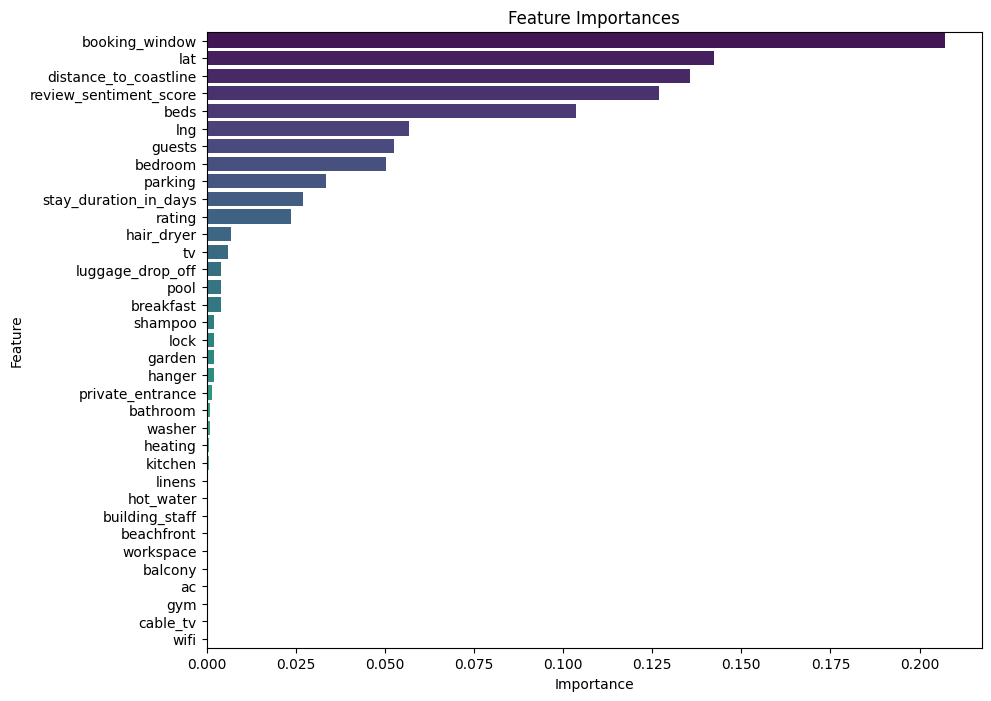

Mean Absolute Error: 20684.880205255813


In [11]:
model = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.3, max_depth=7, random_state=42)

# Melatih model pada data
model.fit(X_train, y_train)

# Get feature importances from the best model
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances with corresponding column names
fi_df = pd.DataFrame({'Feature': X.columns, 
                      'Importance': feature_importances})

# Sort the DataFrame by feature importance values
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Set the figure size for better readability
plt.figure(figsize=(10, 8))

# Create a barplot with Seaborn
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')

# Add title and labels to the plot
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show the plot
plt.show()

# Make predictions on the test set using the best model
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

In [27]:
X_important = df[['booking_window', 'lat', 'distance_to_coastline', 'review_sentiment_score', 
                  'beds', 'bedroom','guests', 'lng', 'stay_duration_in_days', 'rating', 'parking']]
y_important = df['average_daily_rate']

# Melakukan standarisasi pada fitur
scaler = StandardScaler()
X_scaled_important = scaler.fit_transform(X_important)

# Split the important data into training and testing sets
X_train_important, X_test_important, y_train_important, y_test_important = train_test_split(X_scaled_important, y_important, test_size=0.2, random_state=42)

In [28]:
# Initialize the XGBoost model
model = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.3, max_depth=7, random_state=42)

# Fit the model on the training important data
model.fit(X_train_important, y_train_important)

# Make predictions on the test important data
y_pred_important_train = model.predict(X_train_important)
y_pred_important_test = model.predict(X_test_important)

# Evaluate the model
mae_important_train = mean_absolute_error(y_train_important, y_pred_important_train)
mae_important_test = mean_absolute_error(y_test_important, y_pred_important_test)
print(f'Mean Absolute Error on Training: {mae_important_train}')
print(f'Mean Absolute Error on Test: {mae_important_test}')

Mean Absolute Error on Training: 9593.93837992285
Mean Absolute Error on Test: 17001.859671736605


In [14]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

In [15]:
# Load the trained XGBoost model
gradientBoosting_model = joblib.load('gradient_boosting_model.pkl')

# Use XGBoost model to make predictions
gradientBoosting_predictions_test = gradientBoosting_model.predict(X_test_important)

# Now you can use these predictions in your TensorFlow code
print(gradientBoosting_predictions_test[:10])

[462079.84647597 540038.42711749 360157.57963244 655671.09041547
 506735.96006514 559194.35869438 395438.16297376 440054.68275382
 620090.08191366 620094.8616359 ]


### Pipeline For Prediction

In [17]:
predicted_column = ['property_name', 'room_id', 
                    'booking_window', 'lat', 'distance_to_coastline', 
                    'review_sentiment_score', 'beds', 'bedroom','guests', 
                    'lng', 'stay_duration_in_days', 'rating', 'parking', 
                    'average_daily_rate']

X_predicted = df[predicted_column]

In [29]:
import pandas as pd
from datetime import date
import joblib

def get_distinct_properties(df):
    return df.drop_duplicates(subset=['property_name', 'room_id'])

def booking_window(today, check_in):
    return (check_in - today).days

def stay_duration(check_in, check_out):
    return (check_out - check_in).days

def predict(predicted_df, property_name, room_id, check_in, check_out):
    # Select property name dan room_id
    distinct_df = get_distinct_properties(predicted_df)
    
    # Select property name and room_id
    filtered_df = distinct_df[(distinct_df['property_name'] == property_name) & 
                              (distinct_df['room_id'] == room_id)].copy()
    
    if filtered_df.empty:
        raise ValueError("No matching property_name and room_id found in the data")
    
    # Save the current price
    current_price = filtered_df['average_daily_rate'].values
    
    # Drop unnecessary columns
    filtered_df.drop(columns=['property_name', 'room_id', 'average_daily_rate'], inplace=True)
    
    # Feature engineering booking window
    today = date.today()
    booking_window_days = booking_window(today, check_in)
    
    # Feature engineering stay duration
    stay_duration_days = stay_duration(check_in, check_out)
    
    # Replace values in columns
    filtered_df['stay_duration_in_days'] = stay_duration_days
    filtered_df['booking_window'] = booking_window_days
    
    # print("Filtered DataFrame after replacing values:\n", filtered_df)
    # print("Booking window (days):", booking_window_days)
    # print("Stay duration (days):", stay_duration_days)
    
    # Predict
    gradientBoosting_model = joblib.load('gradient_boosting_model.pkl')
    gradientBoosting_predictions_test = gradientBoosting_model.predict(filtered_df)
    
    return gradientBoosting_predictions_test, current_price

def format_currency(value):
    value_str = f"{value:,.2f}"
    value_str = value_str.replace(',', 'X').replace('.', ',').replace('X', '.')
    return f"Rp {value_str}"

# Example usage
check_in = date(2024, 12, 31)
check_out = date(2025, 1, 1)

prediction, current_price = predict(X_predicted, 'Pondok Bagus Guesthouse', 397680, check_in, check_out)
formatted_current_price = format_currency(current_price[0])
formatted_prediction = format_currency(prediction[0])

print("Current Price:", formatted_current_price)
print("Prediction:", formatted_prediction)

Current Price: Rp 410.111,41
Prediction: Rp 1.019.518,08


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
